In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import LineString

In [2]:
# https://stackoverflow.com/questions/45776737/anottating-along-a-matplotlib-curve
# https://stackoverflow.com/questions/18780198/how-to-rotate-matplotlib-annotation-to-match-a-line

In [45]:
import cv2
img = cv2.imread("BEL17-2-2_1.66x_milieu0001.png")

Text(635.3553390593274, 564.6446609406726, 'right')

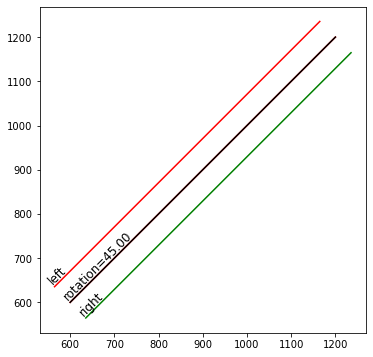

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.set_aspect('equal')

x1 = 600
y1 = 600
x2 = 1200
y2 = 1200
line, = ax.plot([x1, x2], [y1, y2], c='r')

# compute angle in raw data coordinates (no manual transforms)
dy = y2 - y1
dx = x2 - x1
angle = np.rad2deg(np.arctan2(dy, dx))

# annotate with transform_rotates_text to align text and line
plt.text(x1, y1, 'rotation=%.2f'%angle, ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor')

line = LineString([(x1,y1), (x2,y2)])
ax.plot(line.xy[0], line.xy[1], c='black')
left = line.parallel_offset(50, 'left')
right = line.parallel_offset(50, 'right')
ax.plot(left.xy[0], left.xy[1], c='r')
ax.plot(right.xy[0], right.xy[1], c='g')
ax.text(left.boundary.geoms[0].xy[0][0], left.boundary.geoms[0].xy[1][0], 'left', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)
ax.text(right.boundary.geoms[1].xy[0][0], right.boundary.geoms[1].xy[1][0], 'right', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)

Text(635.3553390593274, 564.6446609406726, 'right')

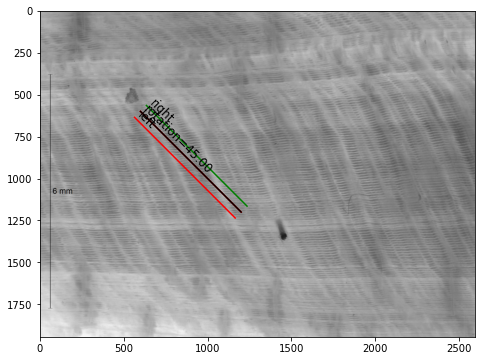

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.imshow(img, cmap='gray', aspect='equal')

x1 = 600
y1 = 600
x2 = 1200
y2 = 1200
line, = ax.plot([x1, x2], [y1, y2], c='r')

# compute angle in raw data coordinates (no manual transforms)
dy = y2 - y1
dx = x2 - x1
angle = np.rad2deg(np.arctan2(dy, dx))

# annotate with transform_rotates_text to align text and line
plt.text(x1, y1, 'rotation=%.2f'%angle, ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor')

line = LineString([(x1,y1), (x2,y2)])
ax.plot(line.xy[0], line.xy[1], c='black')
left = line.parallel_offset(50, 'left')
right = line.parallel_offset(50, 'right')
ax.plot(left.xy[0], left.xy[1], c='r')
ax.plot(right.xy[0], right.xy[1], c='g')
ax.text(left.boundary.geoms[0].xy[0][0], left.boundary.geoms[0].xy[1][0], 'left', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)
ax.text(right.boundary.geoms[1].xy[0][0], right.boundary.geoms[1].xy[1][0], 'right', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)

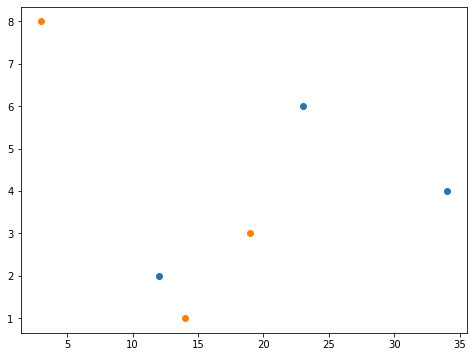

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

sc1 = ax.scatter([12,23,34],[2,6,4])
sc2 = ax.scatter([19,3,14],[3,8,1])

In [79]:
a = sc2.get_offsets()
b = sc1.get_offsets()
c = sc1.get_offsets()

In [94]:
sc1

In [93]:
l = [a.get_offsets() for a in [sc1, sc2]]

[masked_array(
   data=[[12.0, 2.0],
         [23.0, 6.0],
         [34.0, 4.0]],
   mask=[[False, False],
         [False, False],
         [False, False]],
   fill_value=1e+20),
 masked_array(
   data=[[19.0, 3.0],
         [3.0, 8.0],
         [14.0, 1.0]],
   mask=[[False, False],
         [False, False],
         [False, False]],
   fill_value=1e+20)]

In [92]:
np.concatenate(l)

masked_array(
  data=[[12.,  2.],
        [23.,  6.],
        [34.,  4.],
        [19.,  3.],
        [ 3.,  8.],
        [14.,  1.]],
  mask=False,
  fill_value=1e+20)